In [1]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline

In [2]:
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2020, 6,30)

In [3]:
# First download the data

#delta = web.DataReader('DAL', 'yahoo', start, end)
#alaska = web.DataReader('ALK', 'yahoo', start, end)
#southwest = web.DataReader('LUV', 'yahoo', start, end)
#american = web.DataReader('AAL', 'yahoo', start, end)
#jetblue = web.DataReader('JBLU', 'yahoo', start, end)
#united = web.DataReader('UAL', 'yahoo', start, end)

In [4]:
# Save the data to your pc

#delta.to_csv('delta.csv')
#alaska.to_csv('alaska.csv')
#southwest.to_csv('southwest.csv')
#american.to_csv('american.csv')
#jetblue.to_csv('jetblue.csv')
#united.to_csv('united.csv')

In [5]:
# Then you can read the saved data from your local pc

delta = pd.read_csv('delta.csv', parse_dates = True, index_col = 0)
alaska = pd.read_csv('alaska.csv', parse_dates = True, index_col = 0)
southwest = pd.read_csv('southwest.csv', parse_dates = True, index_col = 0)
american = pd.read_csv('american.csv', parse_dates = True, index_col = 0)
jetblue = pd.read_csv('jetblue.csv', parse_dates = True, index_col = 0)
united = pd.read_csv('united.csv', parse_dates = True, index_col = 0)

In [6]:
delta.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-03,50.139999,49.169998,49.369999,49.480000,5423200.0,45.716614
2017-01-04,50.930000,49.990002,50.090000,50.700001,7898600.0,46.843826
2017-01-05,50.689999,49.500000,50.410000,49.730000,5806200.0,45.947598
2017-01-06,50.299999,49.220001,49.790001,49.680000,6922700.0,45.901398
2017-01-09,50.169998,49.419998,49.459999,49.689999,5332900.0,45.910641


Let's take a look at Adjusted Closing price of each stock

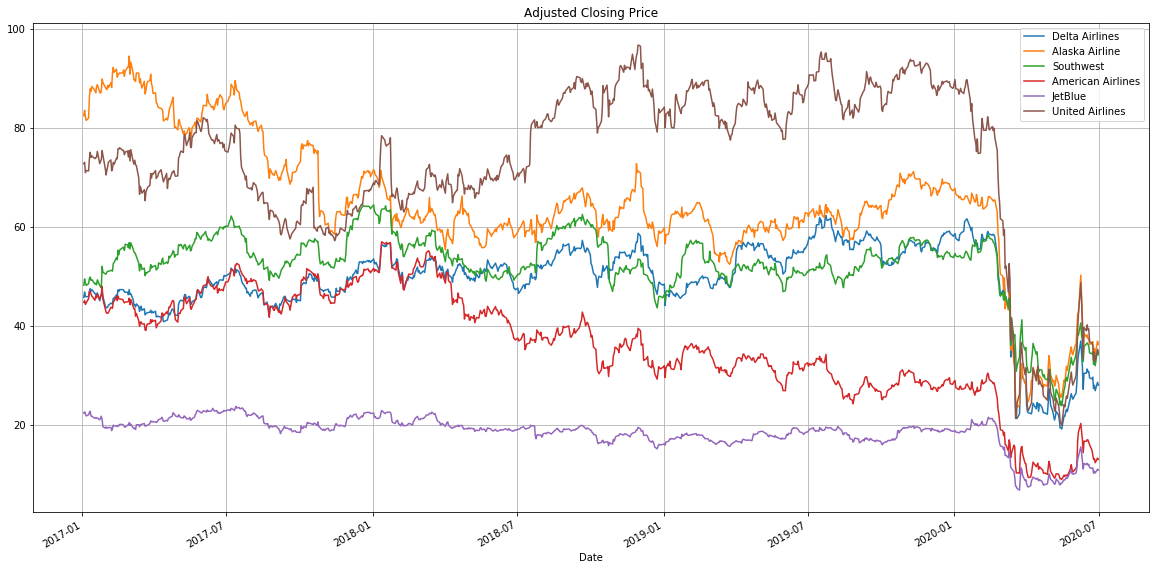

In [7]:
delta['Adj Close'].plot(label ='Delta Airlines', figsize = (20,10), title = 'Adjusted Closing Price')
alaska['Adj Close'].plot(label = 'Alaska Airline')
southwest['Adj Close'].plot(label='Southwest')
american['Adj Close'].plot(label='American Airlines')
jetblue['Adj Close'].plot(label='JetBlue')
united['Adj Close'].plot(label='United Airlines')
plt.grid()
plt.legend();

Adjusted closing price after 1st of January. A fall in the price can be noticed due to COVID-19

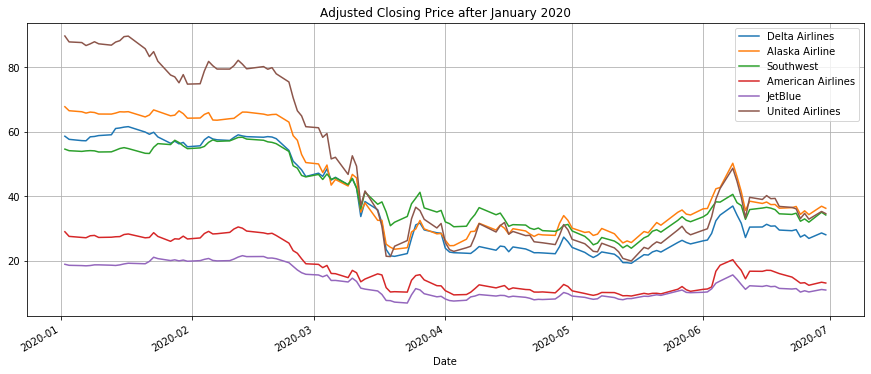

In [8]:
delta.loc['2020-01-01':]['Adj Close'].plot(label ='Delta Airlines', figsize = (15,6), title = 'Adjusted Closing Price after January 2020')
alaska.loc['2020-01-01':]['Adj Close'].plot(label = 'Alaska Airline')
southwest.loc['2020-01-01':]['Adj Close'].plot(label='Southwest')
american.loc['2020-01-01':]['Adj Close'].plot(label='American Airlines')
jetblue.loc['2020-01-01':]['Adj Close'].plot(label='JetBlue')
united.loc['2020-01-01':]['Adj Close'].plot(label='United Airlines')
plt.grid()
plt.legend();

Volume of shares traded daily 

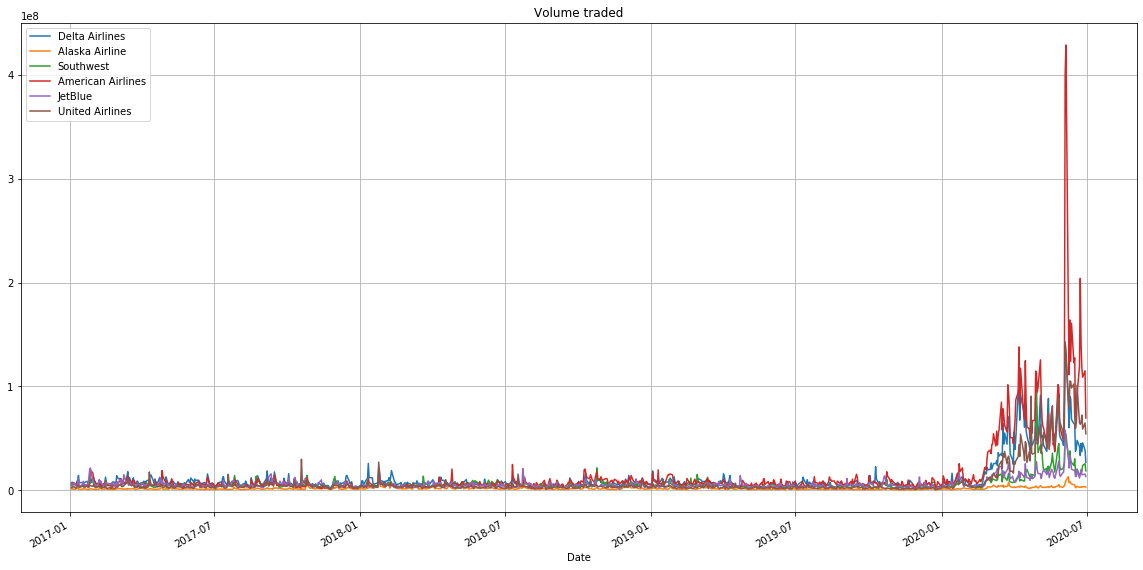

In [9]:
# Volume traded

delta['Volume'].plot(label ='Delta Airlines', figsize = (20,10), title = 'Volume traded')
alaska['Volume'].plot(label = 'Alaska Airline')
southwest['Volume'].plot(label='Southwest')
american['Volume'].plot(label='American Airlines')
jetblue['Volume'].plot(label='JetBlue')
united['Volume'].plot(label='United Airlines')
plt.grid()
plt.legend();

Volume traded before January 2020. 

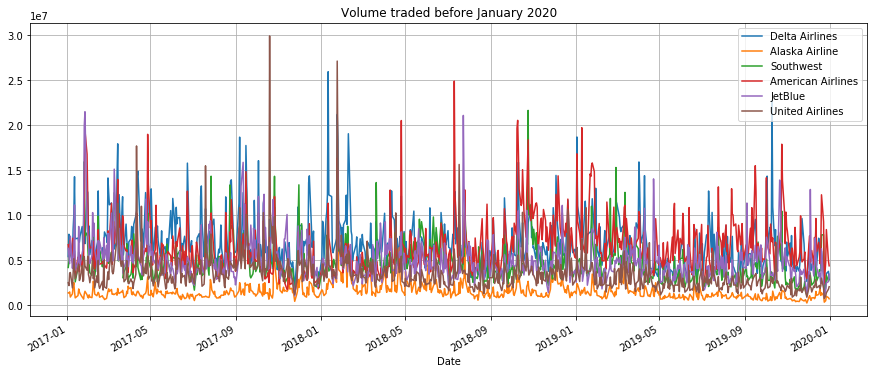

In [10]:
delta.loc[:'2020-01-01']['Volume'].plot(label ='Delta Airlines', figsize = (15,6), title = 'Volume traded before January 2020')
alaska.loc[:'2020-01-01']['Volume'].plot(label = 'Alaska Airline')
southwest.loc[:'2020-01-01']['Volume'].plot(label='Southwest')
american.loc[:'2020-01-01']['Volume'].plot(label='American Airlines')
jetblue.loc[:'2020-01-01']['Volume'].plot(label='JetBlue')
united.loc[:'2020-01-01']['Volume'].plot(label='United Airlines')
plt.grid()
plt.legend();

Volume traded after January 2020. 

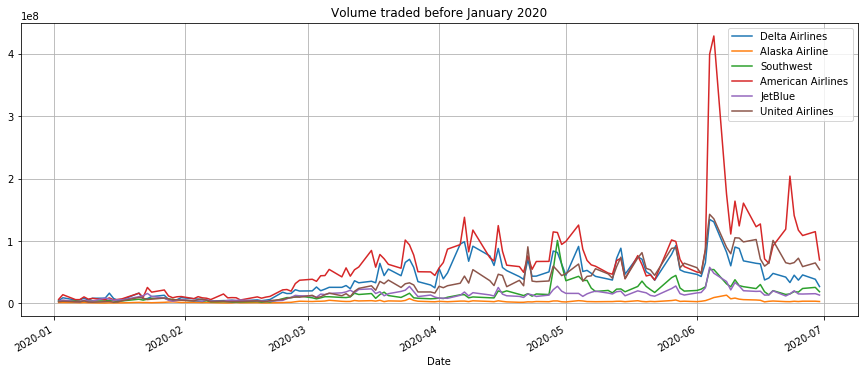

In [11]:
delta.loc['2020-01-01':]['Volume'].plot(label ='Delta Airlines', figsize = (15,6), title = 'Volume traded before January 2020')
alaska.loc['2020-01-01':]['Volume'].plot(label = 'Alaska Airline')
southwest.loc['2020-01-01':]['Volume'].plot(label='Southwest')
american.loc['2020-01-01':]['Volume'].plot(label='American Airlines')
jetblue.loc['2020-01-01':]['Volume'].plot(label='JetBlue')
united.loc['2020-01-01':]['Volume'].plot(label='United Airlines')
plt.grid()
plt.legend();

The trading volume of American Airlines was really high at the begigning of june 2020. One may wonder what happened this days. We can obtain the peek date of trading and then just google for news. 

In [12]:
american.index[american['Volume'].argmax()]

Timestamp('2020-06-05 00:00:00')

That's what I found on the web: https://fortune.com/2020/06/05/american-airlines-stock-adds-to-yesterdays-41-gain-as-reopening-optimism-soars/

# Simple Moving average 

### https://en.wikipedia.org/wiki/Moving_average


In [13]:
# Let's calculate simple moving average for different time windows for United Airlines 
# and then plot it together with adjusted close price

united['7MA'] = united['Adj Close'].rolling(window = 7).mean() 
#united['30MA'] = united['Adj Close'].rolling(window = 30).mean() 
united['50MA'] = united['Adj Close'].rolling(window = 50).mean() 
united['100MA'] = united['Adj Close'].rolling(window = 100).mean() 

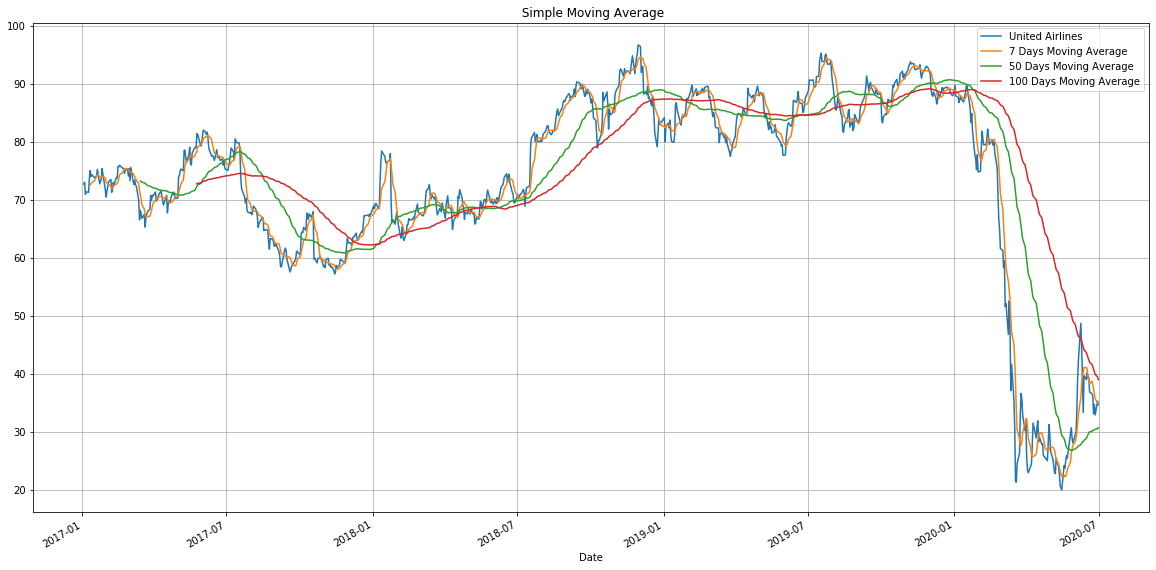

In [14]:
united['Adj Close'].plot(label='United Airlines', figsize = (20, 10), title = ' Simple Moving Average')
united['7MA'].plot(label='7 Days Moving Average')
#united['30MA'].plot(label='30 Days Moving Average')
united['50MA'].plot(label='50 Days Moving Average')
united['100MA'].plot(label='100 Days Moving Average')
plt.grid()
plt.legend();

## Correlation between adjusted closing prices of the companies

In [15]:
from pandas.plotting import scatter_matrix

In [16]:
airlines_comp = pd.concat([delta['Adj Close'],alaska['Adj Close'], southwest['Adj Close'],
                      american['Adj Close'], jetblue['Adj Close'], united['Adj Close']], axis = 1)

In [17]:
airlines_comp.columns = ['Delta', 'Alaska', 'Southwest', 'American', 'JetBlue', 'United Airlines']

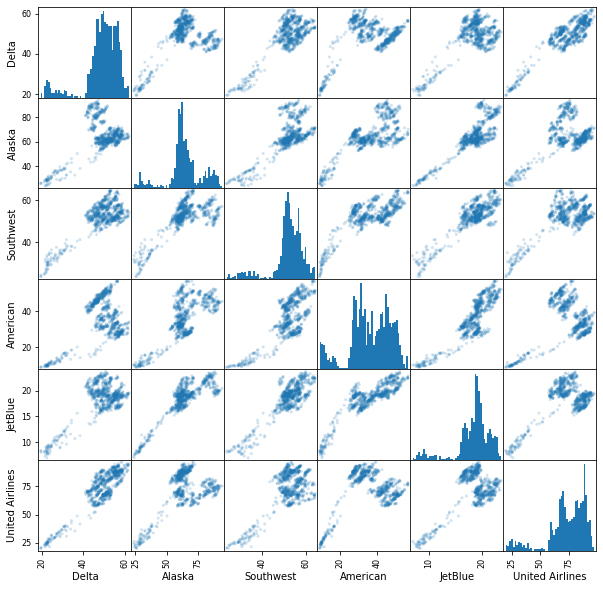

In [18]:
scatter_matrix(airlines_comp, figsize=(10,10), alpha =0.2, hist_kwds={'bins':50})
plt.legend;

As you can see the adjusted stock prices of different airlines are highly correlated. 

Let's take a look at the data before January 2020.

In [19]:
airlines_comp2 = pd.concat([delta.loc[:'2020-01-01']['Adj Close'],alaska.loc[:'2020-01-01']['Adj Close'],
                            southwest.loc[:'2020-01-01']['Adj Close'],american.loc[:'2020-01-01']['Adj Close'],
                            jetblue.loc[:'2020-01-01']['Adj Close'], united.loc[:'2020-01-01']['Adj Close']],
                            axis = 1)

airlines_comp2.columns = ['Delta', 'Alaska', 'Southwest', 'American', 'JetBlue', 'United Airlines']

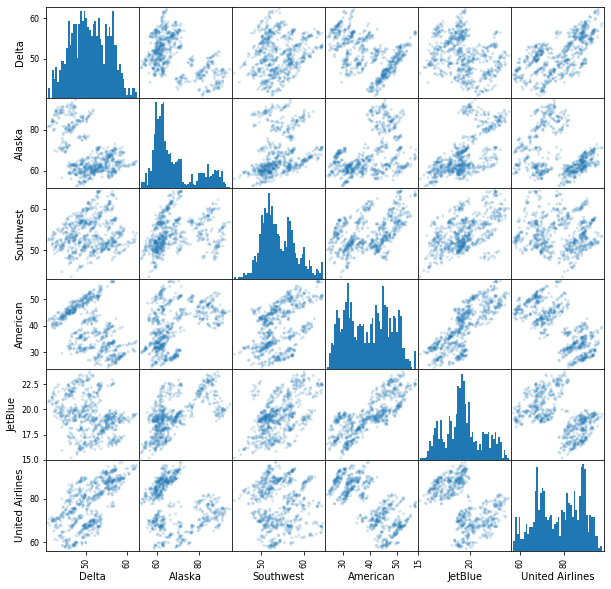

In [20]:
scatter_matrix(airlines_comp2, figsize=(10,10), alpha =0.2, hist_kwds={'bins':50})
plt.legend;

# Basic financial analysis

## Daily returns of each stock

In [21]:
# Calculating returns using pandas built-in method

delta['Daily Returns'] = delta['Adj Close'].pct_change()
alaska['Daily Returns'] = alaska['Adj Close'].pct_change()
southwest['Daily Returns'] = southwest['Adj Close'].pct_change()
american['Daily Returns'] = american['Adj Close'].pct_change()
jetblue['Daily Returns'] = jetblue['Adj Close'].pct_change()
united['Daily Returns'] = united['Adj Close'].pct_change()

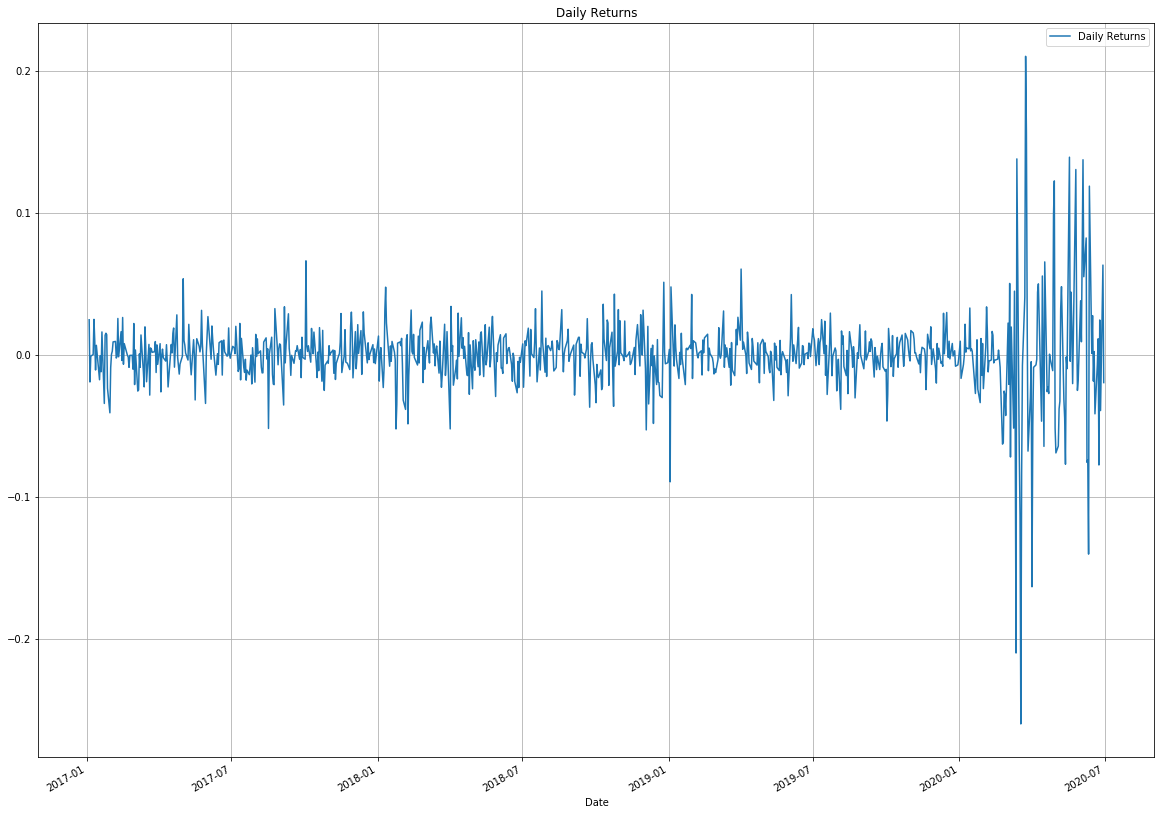

In [22]:
# Daily return time series for Delta Stock

delta['Daily Returns'].plot(figsize=(20,15), title = 'Daily Returns')
plt.grid()
plt.legend();

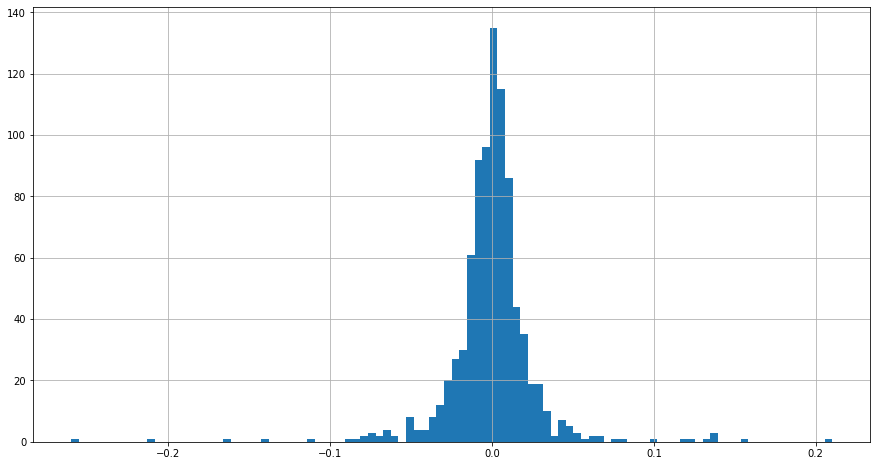

In [23]:
# Histogram of daily return of Delta
delta['Daily Returns'].hist(bins=100, figsize = (15,8))

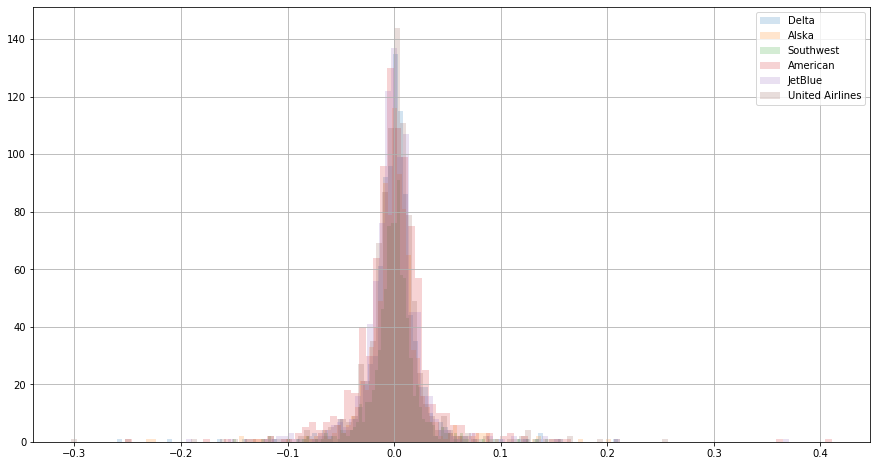

In [24]:
# Histograms of all stock's daily returns

delta['Daily Returns'].hist(bins=100, label = 'Delta', figsize=(15,8), alpha = 0.2)
alaska['Daily Returns'].hist(bins=100, label = 'Alska', alpha = 0.2)
southwest['Daily Returns'].hist(bins=100, label = 'Southwest',alpha = 0.2)
american['Daily Returns'].hist(bins=100, label = 'American',alpha = 0.2)
jetblue['Daily Returns'].hist(bins=100, label = 'JetBlue', alpha = 0.2)
united['Daily Returns'].hist(bins=100, label = 'United Airlines', alpha = 0.2)
plt.legend();

## Kernel Density Estimation plot

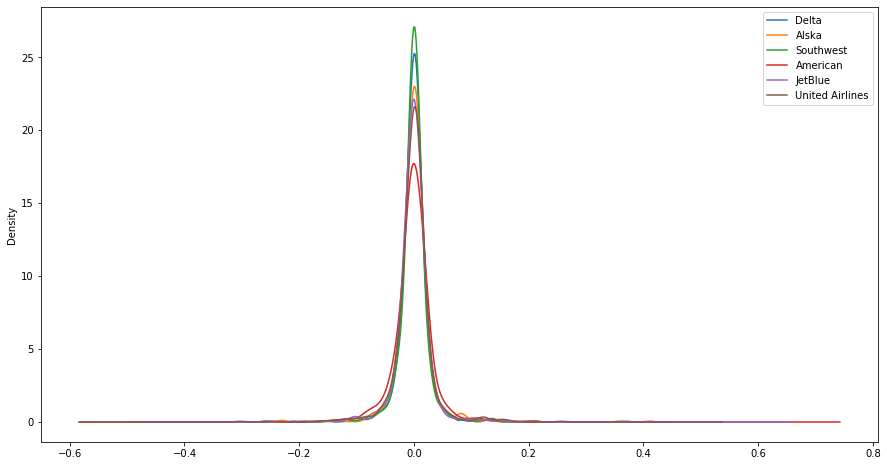

In [25]:
delta['Daily Returns'].plot(kind = 'kde', label = 'Delta', figsize=(15,8))
alaska['Daily Returns'].plot(kind = 'kde', label = 'Alska')
southwest['Daily Returns'].plot(kind = 'kde', label = 'Southwest')
american['Daily Returns'].plot(kind = 'kde', label = 'American')
jetblue['Daily Returns'].plot(kind = 'kde', label = 'JetBlue')
united['Daily Returns'].plot(kind = 'kde', label = 'United Airlines')
plt.legend();

## Box Plot

In [26]:
box_df = pd.concat([delta['Daily Returns'], alaska['Daily Returns'], southwest['Daily Returns'],
                    american['Daily Returns'], jetblue['Daily Returns'], united['Daily Returns']],axis = 1)
                    
box_df.columns = ['Delta', 'Alaska', 'Southwest', 'American', 'JetBlue', 'United Airlines']

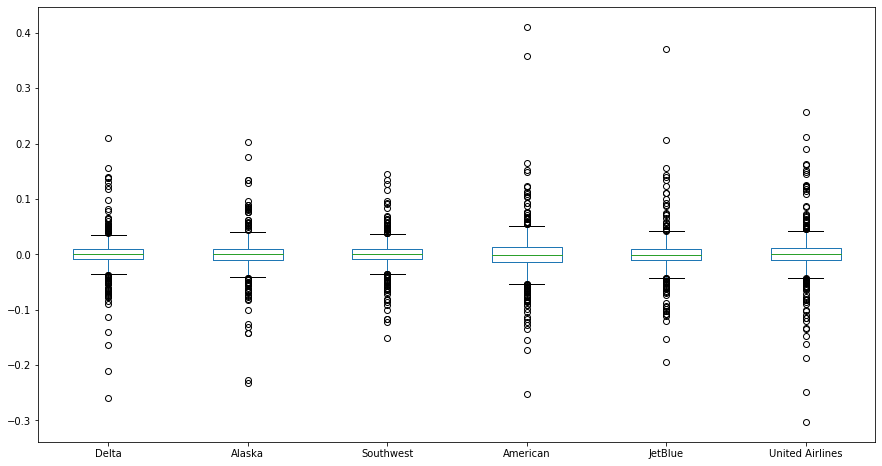

In [27]:
box_df.plot(kind='box', figsize = (15,8))

No handles with labels found to put in legend.


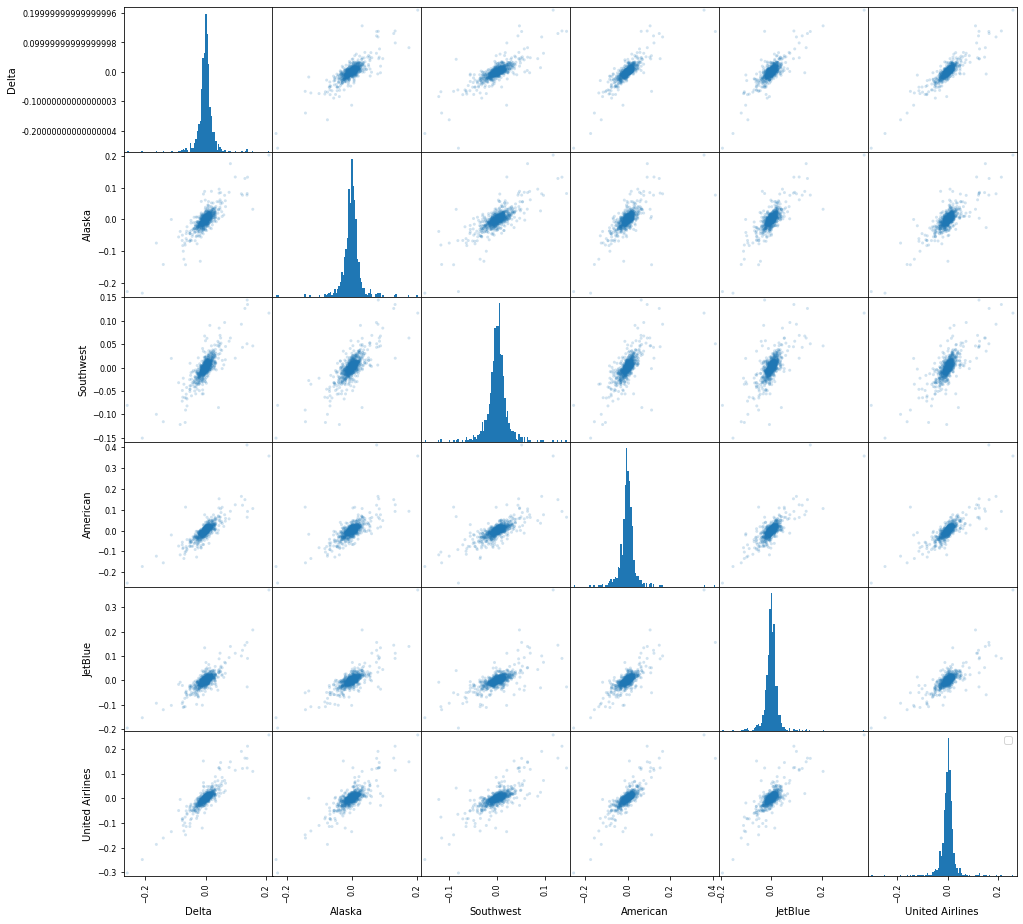

In [28]:
# Comparing Daily returns between Stocks

scatter_matrix(box_df, figsize=(16,16), alpha = 0.2, hist_kwds={'bins': 100})
plt.legend();

# Cumulative returns

In [29]:
delta['Cumulative Return'] = (1 + delta['Daily Returns']).cumprod()
alaska['Cumulative Return'] = (1 + alaska['Daily Returns']).cumprod()
southwest['Cumulative Return'] = (1 + southwest['Daily Returns']).cumprod()
american['Cumulative Return'] = (1 + american['Daily Returns']).cumprod()
jetblue['Cumulative Return'] = (1 + jetblue['Daily Returns']).cumprod()
united['Cumulative Return'] = (1 + united['Daily Returns']).cumprod()

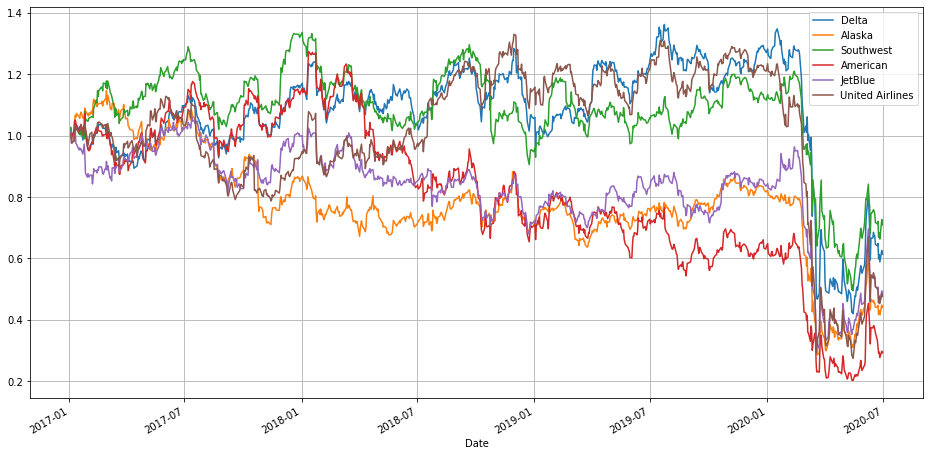

In [30]:
delta['Cumulative Return'].plot(label='Delta', figsize=(16,8))
alaska['Cumulative Return'].plot(label='Alaska')
southwest['Cumulative Return'].plot(label='Southwest')
american['Cumulative Return'].plot(label='American')
jetblue['Cumulative Return'].plot(label='JetBlue')
united['Cumulative Return'].plot(label='United Airlines')
plt.grid()
plt.legend();